# 0. 라이브러리 & 환경 세팅

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. 데이터 불러오기

In [4]:
data = pd.read_csv('./segments_df.csv')
data.head(3)

,segment,segment_id,class,area_m2,ratio_rg_change,ndvi,ndvi_change,brightness,brightness_change,gndvi,nd_std,slope_mean,slope_max,b3,b4,b2,b8,height_min,height_max,ndvi_deviation,ratio_rg_change_deviation,brightness_deviation,gndvi_deviation,ndvi_change_deviation,brightness_change_deviation,nd_std_deviation,relative_relief
0,0,L10_S1080,1,10100.0,0.505866,0.317931,-0.004095,1.132990,0.028165,0.276213,0.135762,13.301311,29.969387,1109.148515,1075.108911,1214.712871,1926.653465,211.0,254.0,-0.187525,-0.000320,0.327838,-0.118387,0.001455,0.011976,0.053578,43.0
1,1,L10_S1144,1,15500.0,0.495720,0.443629,0.081099,0.693660,0.077635,0.288002,0.079674,26.386656,38.766735,701.767742,488.561290,890.651613,1325.548387,263.0,332.0,-0.061827,-0.010466,-0.111492,-0.106598,0.086649,0.061446,-0.002510,69.0
2,2,L10_S1143,1,10500.0,0.531246,0.398354,0.092322,0.777133,0.046721,0.280086,0.089477,21.720925,31.067787,778.942857,602.514286,949.942857,1404.885714,228.0,303.0,-0.107102,0.025059,-0.028019,-0.114513,0.097872,0.030531,0.007292,75.0


# 2. 데이터 전처리

In [5]:
data.shape

(3644, 27)

In [6]:
data.columns

Index(['segment', 'segment_id', 'class', 'area_m2', 'ratio_rg_change', 'ndvi',
       'ndvi_change', 'brightness', 'brightness_change', 'gndvi', 'nd_std',
       'slope_mean', 'slope_max', 'b3', 'b4', 'b2', 'b8', 'height_min',
       'height_max', 'ndvi_deviation', 'ratio_rg_change_deviation',
       'brightness_deviation', 'gndvi_deviation', 'ndvi_change_deviation',
       'brightness_change_deviation', 'nd_std_deviation', 'relative_relief'],
      dtype='object')

# 3. train test split

In [7]:
X = data[['ndvi','ratio_rg_change_deviation','brightness_change_deviation','ndvi_change_deviation','brightness','slope_mean',
                'gndvi_deviation','slope_max','nd_std','relative_relief']]
y = data['class']

In [8]:
X.shape

(3644, 10)

In [9]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((2550, 10), (1094, 10), (2550,), (1094,))

In [11]:
train_X.head(2)

,ndvi,ratio_rg_change_deviation,brightness_change_deviation,ndvi_change_deviation,brightness,slope_mean,gndvi_deviation,slope_max,nd_std,relative_relief
328,0.143441,-0.083389,-0.008348,0.106329,0.776667,4.804399,-0.456119,21.811171,0.232277,7.000000
1789,0.088134,-0.102105,0.057645,0.216367,0.756953,12.289646,-0.500204,36.491138,0.192811,33.183381


# 4. Scaling

In [12]:
train_X.head(7)

,ndvi,ratio_rg_change_deviation,brightness_change_deviation,ndvi_change_deviation,brightness,slope_mean,gndvi_deviation,slope_max,nd_std,relative_relief
328,0.143441,-0.083389,-0.008348,0.106329,0.776667,4.804399,-0.456119,21.811171,0.232277,7.000000
1789,0.088134,-0.102105,0.057645,0.216367,0.756953,12.289646,-0.500204,36.491138,0.192811,33.183381
2498,0.256566,-0.050054,0.027504,0.000326,1.067047,7.283115,-0.184062,15.970316,0.143464,16.000000
367,0.248263,0.214078,-0.280331,0.016739,1.266725,4.164677,-0.096542,23.301413,0.092519,17.000000
3146,0.549813,0.035644,0.011561,0.061658,0.642610,29.101764,-0.008897,40.553181,0.061209,97.000000
2761,0.124150,-0.152914,0.095011,0.230181,0.741789,10.087061,-0.462099,20.669336,0.229980,14.000000
1941,0.256750,0.086491,-0.242610,0.022062,1.280553,5.860932,-0.143242,12.614266,0.109939,7.000000


In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

cols = train_X.columns
idx_tr = train_X.index
idx_te = test_X.index

# DataFrame으로 변환 후 Scaler 적용
train_X = pd.DataFrame(scaler.fit_transform(train_X), columns=cols, index=idx_tr)
test_X = pd.DataFrame(scaler.transform(test_X), columns=cols, index=idx_te)

In [14]:
train_X.head(3)

,ndvi,ratio_rg_change_deviation,brightness_change_deviation,ndvi_change_deviation,brightness,slope_mean,gndvi_deviation,slope_max,nd_std,relative_relief
328,-0.905999,-1.027011,0.590440,0.452266,-1.032413,-0.745566,-1.801453,-0.238603,2.454213,-0.723863
1789,-1.331062,-1.170534,0.958985,1.386956,-1.099521,0.025751,-2.086781,0.969437,1.546823,-0.074591
2498,-0.036578,-0.771375,0.790660,-0.448165,-0.043931,-0.490147,-0.040624,-0.719257,0.412217,-0.500689


In [15]:
feature_list = X.columns
feature_list

Index(['ndvi', 'ratio_rg_change_deviation', 'brightness_change_deviation',
       'ndvi_change_deviation', 'brightness', 'slope_mean', 'gndvi_deviation',
       'slope_max', 'nd_std', 'relative_relief'],
      dtype='object')

In [16]:
train_y.value_counts()

0    2378
1     172
Name: class, dtype: int64

In [17]:
test_y.value_counts()

0    1009
1      85
Name: class, dtype: int64

## 5. 모델링 코드 함수 정의

In [18]:
import sklearn
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support as performance
from sklearn.metrics import classification_report,confusion_matrix
#from plot_metric.functions import BinaryClassification
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from inspect import signature

In [19]:
# name of the classes: 1 = landslides; 0 =  non-landslides
class_name = data['class'].unique()

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
#    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           #label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Actual class',
           xlabel='Predicted class')
#     plt.grid(b=None)
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    #export the confusion matrix
    #fig.savefig(confusion_matrix_output_path) 
    
    return ax 
plt.show()


In [20]:
def feature_importance(classifier,X_train):
    
     importances = list(classifier.feature_importances_)
    
    # List of tuples with variable and importance
     feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

    # Sort the feature importances by most important first
     feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [21]:
def feature_importance_graph(classifier):
    
     # Get numerical feature importances
     importances = list(classifier.feature_importances_)
    
    # List of tuples with variable and importance
     feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

     # Sort the feature importances by most important first
     feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

     # list of x locations for plotting
     x_values = list(range(len(importances)))

    # Make a bar chart
     plt.bar(x_values, importances, orientation = 'vertical', linewidth = 0.9) #color = 'b', edgecolor = 'b'

     # Tick labels for x axis
     plt.xticks(x_values, feature_list, rotation='vertical')

    # Axis labels and title
     plt.ylabel('Importance'); plt.xlabel(''); plt.title('Feature Importances');    
        
     #plt.savefig(feature_importance_output_path) 
    
    # List of features sorted from most to least important
     sorted_importances = [importance[1] for importance in feature_importances]
     sorted_features = [importance[0] for importance in feature_importances]
    
    # #     # Print out the feature and importances 
     [print('Variable: {:20}Importance: {}'.format(*pair)) for pair in feature_importances];    

In [22]:
def model_performance(y_test,prediction_sampling):
    
        print( '\n'+'Classification_report:'+'\n'+'\n',classification_report(y_test,prediction_sampling))
        plot_confusion_matrix(y_test, prediction_sampling, classes=class_name,title='Confusion matrix')
        
        return classification_report(y_test,prediction_sampling, output_dict=True)

In [23]:
def train_model (model,X_train, y_train, X_test,y_test):
    
    model.fit (X_train, y_train)
    predictions = model.predict(X_test)
    metrics = model_performance(y_test,predictions)
    print ('------------------------------------------------------'+ '\n')
    
    return metrics

In [24]:
def model_run(model, X_train, y_train, X_test, y_test): 
    
    train_model (model, X_train, y_train, X_test, y_test)
    if feature_importance and hasattr(model, 'feature_importances_'):
        feature_importance(model, X_train)

## 6. 산사태 예측

In [25]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

### DecisionTree

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_X, train_y)

print(f"Accuracy for DecisionTree : {accuracy_score(test_y, dt.predict(test_X))}")
print(f"F1_score for DecisionTree : {f1_score(test_y, dt.predict(test_X))}")

Accuracy for DecisionTree : 0.9579524680073126
F1_score for DecisionTree : 0.7294117647058823


#### DecisionTree Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

# Create the random forest regressor
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object using the defined parameter grid
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_dt.fit(train_X, train_y)

# Get the best parameters from the grid search
best_params = grid_search_dt.best_params_
print("Best hyperparameters for DecisionTree: ", grid_search_dt.best_params_)

Best hyperparameters for DecisionTree:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [28]:
dt = DecisionTreeClassifier(**grid_search_dt.best_params_)
dt.fit(train_X, train_y)

print(f"Accuracy for DecisionTree : {accuracy_score(test_y, dt.predict(test_X))}")
print(f"F1_score for DecisionTree : {f1_score(test_y, dt.predict(test_X))}")

Accuracy for DecisionTree : 0.9597806215722121
F1_score for DecisionTree : 0.7380952380952379



Classification_report:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1009
           1       0.73      0.74      0.74        85

    accuracy                           0.96      1094
   macro avg       0.86      0.86      0.86      1094
weighted avg       0.96      0.96      0.96      1094

[[986  23]
 [ 22  63]]
------------------------------------------------------



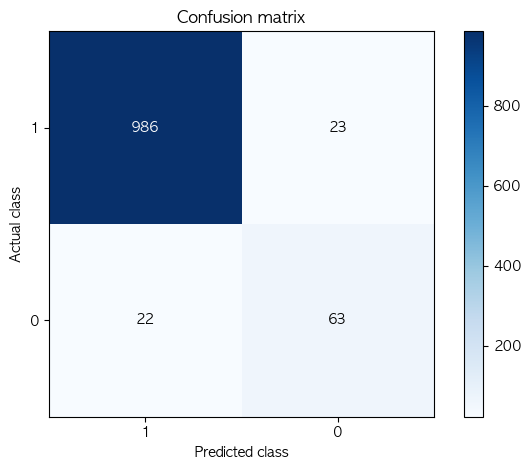

In [29]:
model_run(dt, train_X, train_y, test_X, test_y)

Variable: ndvi                Importance: 0.35
Variable: slope_max           Importance: 0.15
Variable: brightness_change_deviationImportance: 0.12
Variable: nd_std              Importance: 0.12
Variable: ndvi_change_deviationImportance: 0.11
Variable: ratio_rg_change_deviationImportance: 0.07
Variable: brightness          Importance: 0.03
Variable: relative_relief     Importance: 0.03
Variable: gndvi_deviation     Importance: 0.02
Variable: slope_mean          Importance: 0.01


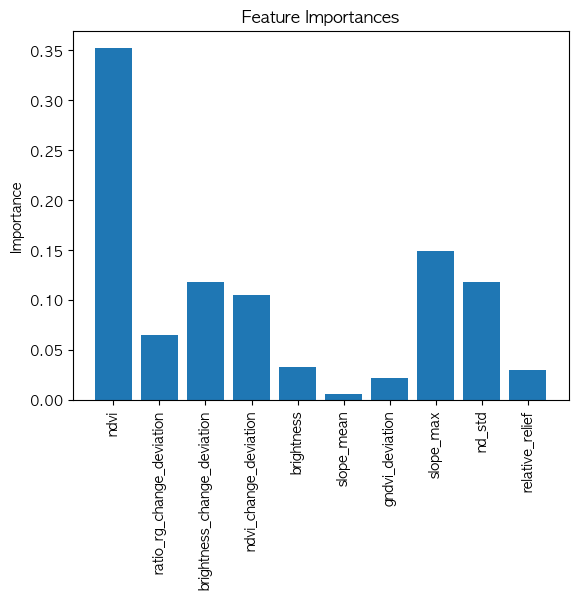

In [30]:
feature_importance_graph(dt) #ranking the features

### RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(train_X, train_y)

print(f"Accuracy for RandomForest : {accuracy_score(test_y, rf.predict(test_X))}")
print(f"F1_score for RandomForest : {f1_score(test_y, rf.predict(test_X))}")

Accuracy for RandomForest : 0.973491773308958
F1_score for RandomForest : 0.8104575163398693


#### RandomForest Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

# Create the random forest regressor
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object using the defined parameter grid
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_rf.fit(train_X, train_y)

# Get the best parameters from the grid search
best_params = grid_search_rf.best_params_
print("Best hyperparameters for RandomForest: ", grid_search_rf.best_params_)

Best hyperparameters for RandomForest:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [33]:
rf = RandomForestClassifier(**grid_search_rf.best_params_)
rf.fit(train_X, train_y)

print(f"Accuracy for RandomForest : {accuracy_score(test_y, rf.predict(test_X))}")
print(f"F1_score for RandomForest : {f1_score(test_y, rf.predict(test_X))}")

Accuracy for RandomForest : 0.9725776965265083
F1_score for RandomForest : 0.8051948051948051



Classification_report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1009
           1       0.91      0.74      0.82        85

    accuracy                           0.97      1094
   macro avg       0.95      0.87      0.90      1094
weighted avg       0.97      0.97      0.97      1094

[[1003    6]
 [  22   63]]
------------------------------------------------------



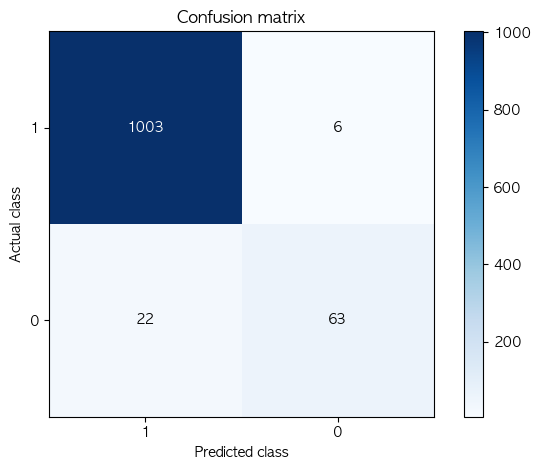

In [34]:
model_run(rf, train_X, train_y, test_X, test_y)

Variable: ndvi                Importance: 0.23
Variable: gndvi_deviation     Importance: 0.17
Variable: nd_std              Importance: 0.11
Variable: ndvi_change_deviationImportance: 0.1
Variable: ratio_rg_change_deviationImportance: 0.08
Variable: relative_relief     Importance: 0.07
Variable: brightness_change_deviationImportance: 0.06
Variable: brightness          Importance: 0.06
Variable: slope_mean          Importance: 0.06
Variable: slope_max           Importance: 0.06


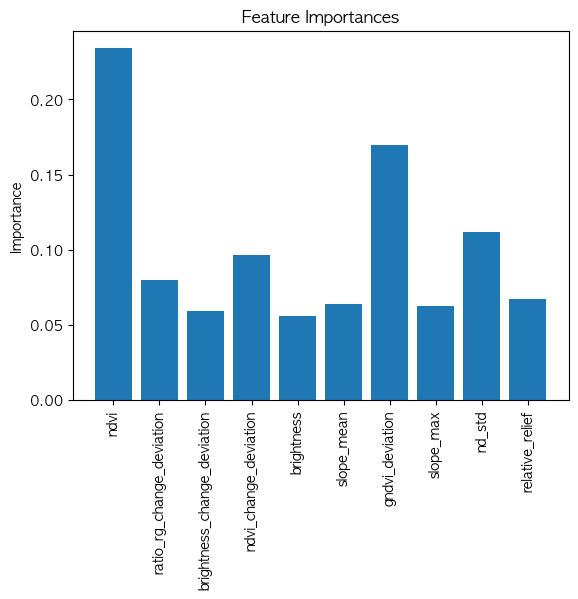

In [35]:
feature_importance_graph(rf) #ranking the features

### LightGBM

In [81]:
from lightgbm import LGBMClassifier

lgbm_final = LGBMClassifier(random_state=42)
lgbm_final.fit(train_X, train_y)

print(f"Accuracy for LightGBM : {accuracy_score(test_y, lgbm_final.predict(test_X))}")
print(f"F1_score for LightGBM : {f1_score(test_y, lgbm_final.predict(test_X))}")

Accuracy for LightGBM : 0.9826325411334552
F1_score for LightGBM : 0.8789808917197452



Classification_report:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1009
           1       0.96      0.81      0.88        85

    accuracy                           0.98      1094
   macro avg       0.97      0.90      0.93      1094
weighted avg       0.98      0.98      0.98      1094

[[1006    3]
 [  16   69]]
------------------------------------------------------



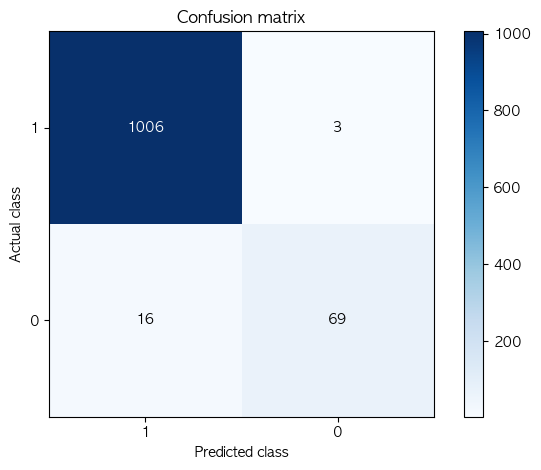

In [82]:
model_run(lgbm_final, train_X, train_y, test_X, test_y)

#### LightGBM Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the model
lgbm = LGBMClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 500, 1000]
}

# Perform grid search
grid_search_lgbm = GridSearchCV(lgbm, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)
grid_search_lgbm.fit(train_X, train_y)

# Print the best hyperparameters
print("Best hyperparameters for LightGBM: ", grid_search_lgbm.best_params_)

Best hyperparameters for LightGBM:  {'learning_rate': 0.1, 'n_estimators': 1000, 'num_leaves': 10}


In [38]:
lgbm = LGBMClassifier(**grid_search_lgbm.best_params_)
lgbm.fit(train_X, train_y)

print(f"Accuracy for LightGBM : {accuracy_score(test_y, lgbm.predict(test_X))}")
print(f"F1_score for LightGBM : {f1_score(test_y, lgbm.predict(test_X))}")

Accuracy for LightGBM : 0.9789762340036563
F1_score for LightGBM : 0.8516129032258064



Classification_report:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1009
           1       0.94      0.78      0.85        85

    accuracy                           0.98      1094
   macro avg       0.96      0.89      0.92      1094
weighted avg       0.98      0.98      0.98      1094

[[1005    4]
 [  19   66]]
------------------------------------------------------



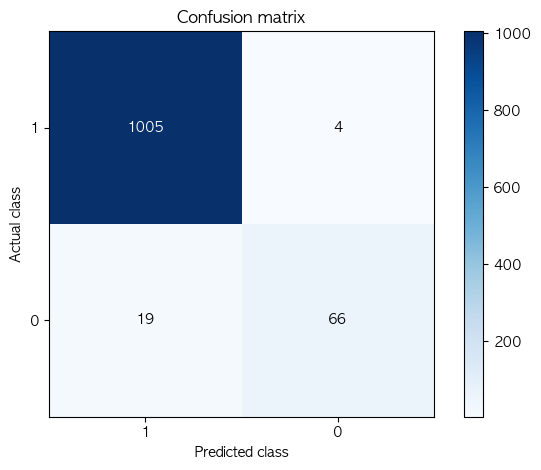

In [39]:
model_run(lgbm, train_X, train_y, test_X, test_y)

Variable: nd_std              Importance: 943
Variable: gndvi_deviation     Importance: 902
Variable: ndvi_change_deviationImportance: 858
Variable: brightness_change_deviationImportance: 751
Variable: ratio_rg_change_deviationImportance: 727
Variable: ndvi                Importance: 627
Variable: slope_mean          Importance: 601
Variable: relative_relief     Importance: 570
Variable: slope_max           Importance: 476
Variable: brightness          Importance: 452


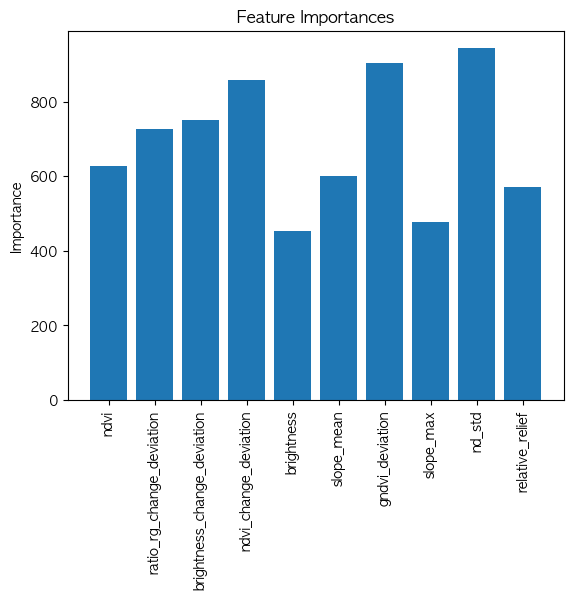

In [40]:
feature_importance_graph(lgbm) #ranking the features

### XGBoost

In [41]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(train_X, train_y)

print(f"Accuracy for XGBoost : {accuracy_score(test_y, xgb.predict(test_X))}")
print(f"F1_score for XGBoost : {f1_score(test_y, xgb.predict(test_X))}")

Accuracy for XGBoost : 0.979890310786106
F1_score for XGBoost : 0.8607594936708861


#### XGBoost Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBClassifier(random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Define the GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the GridSearchCV with the data
grid_search_xgb.fit(train_X, train_y)

# Get the best hyperparameters and print the best score
best_params = grid_search_xgb.best_params_
print("Best hyperparameters for XGBoost: ", best_params)

Best hyperparameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [43]:
xgb = XGBClassifier(**best_params)
xgb.fit(train_X, train_y)

print(f"Accuracy for XGBoost : {accuracy_score(test_y, xgb.predict(test_X))}")
print(f"F1_score for XGBoost : {f1_score(test_y, xgb.predict(test_X))}")

Accuracy for XGBoost : 0.9780621572212066
F1_score for XGBoost : 0.8481012658227848



Classification_report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1009
           1       0.92      0.79      0.85        85

    accuracy                           0.98      1094
   macro avg       0.95      0.89      0.92      1094
weighted avg       0.98      0.98      0.98      1094

[[1003    6]
 [  18   67]]
------------------------------------------------------



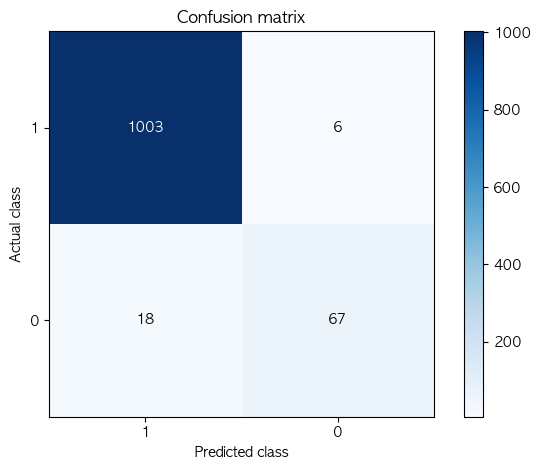

In [44]:
model_run(xgb, train_X, train_y, test_X, test_y)

Variable: ndvi                Importance: 0.3400000035762787
Variable: ndvi_change_deviationImportance: 0.14000000059604645
Variable: slope_max           Importance: 0.10000000149011612
Variable: ratio_rg_change_deviationImportance: 0.07000000029802322
Variable: nd_std              Importance: 0.07000000029802322
Variable: relative_relief     Importance: 0.07000000029802322
Variable: brightness_change_deviationImportance: 0.05999999865889549
Variable: gndvi_deviation     Importance: 0.05999999865889549
Variable: brightness          Importance: 0.05000000074505806
Variable: slope_mean          Importance: 0.03999999910593033


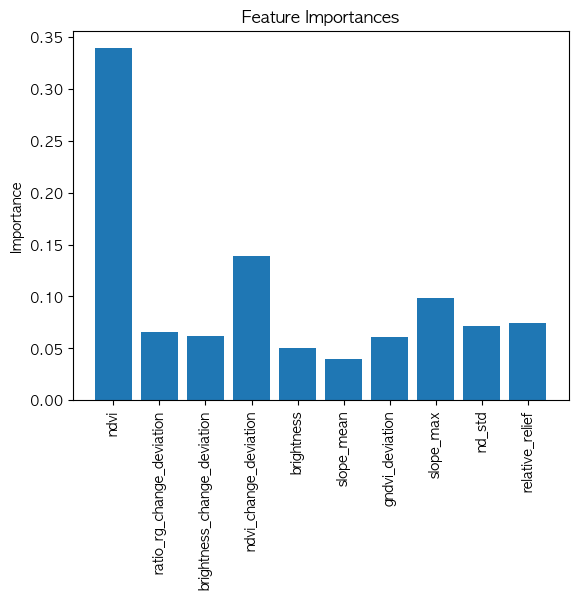

In [45]:
feature_importance_graph(xgb) #ranking the features

### MLP

In [46]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=300, random_state=42)
mlp.fit(train_X, train_y)

print(f"Accuracy for MLP : {accuracy_score(test_y, mlp.predict(test_X))}")
print(f"F1_score for MLP : {f1_score(test_y, mlp.predict(test_X))}")

Accuracy for MLP : 0.973491773308958
F1_score for MLP : 0.8027210884353742


#### MLP Tuning

In [47]:
from sklearn.model_selection import GridSearchCV

# Define the MLPRegressor model
mlp = MLPClassifier(max_iter=300, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {'hidden_layer_sizes': [(10,), (50,)], 
              'activation': ['logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': [0.001, 0.01, 0.1]}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_mlp.fit(train_X, train_y)

# Get the best parameters and the best MLPRegressor model
best_params = grid_search_mlp.best_params_

print("Best hyperparameters for MLP: ", best_params)

/Users/yeorii/opt/anaconda3/envs/yeonii/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yeorii/opt/anaconda3/envs/yeonii/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yeorii/opt/anaconda3/envs/yeonii/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yeorii/opt/anaconda3/envs/yeonii/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

Best hyperparameters for MLP:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'}


In [54]:
mlp = MLPClassifier(**best_params)
mlp.fit(train_X, train_y)

print(f"Accuracy for MLP : {accuracy_score(test_y, mlp.predict(test_X))}")
print(f"F1_score for MLP : {f1_score(test_y, mlp.predict(test_X))}")

Accuracy for MLP : 0.9719626168224299
F1_score for MLP : 0.6417910447761194



Classification_report:

               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1009
           1       0.95      0.69      0.80        85

    accuracy                           0.97      1094
   macro avg       0.96      0.85      0.89      1094
weighted avg       0.97      0.97      0.97      1094

[[1006    3]
 [  26   59]]
------------------------------------------------------



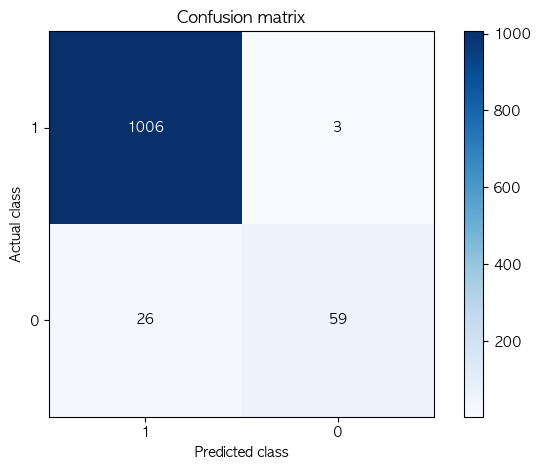

In [48]:
model_run(mlp, train_X, train_y, test_X, test_y)

### ExtraTree

In [58]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(random_state=42)
et.fit(train_X, train_y)

print(f"Accuracy for ExtraTree : {accuracy_score(test_y, et.predict(test_X))}")
print(f"F1_score for ExtraTree : {f1_score(test_y, et.predict(test_X))}")

Accuracy for ExtraTree : 0.9780621572212066
F1_score for ExtraTree : 0.8461538461538461


In [59]:
from sklearn.model_selection import GridSearchCV

# Create the random forest regressor
et = ExtraTreesClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object using the defined parameter grid
grid_search_et = GridSearchCV(estimator=et, param_grid=param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_et.fit(train_X, train_y)

# Get the best parameters from the grid search
best_params = grid_search_et.best_params_
print("Best hyperparameters for ExtraTree: ", grid_search_et.best_params_)

Best hyperparameters for ExtraTree:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [60]:
et = ExtraTreesClassifier(**grid_search_et.best_params_)
et.fit(train_X, train_y)

print(f"Accuracy for ExtraTree : {accuracy_score(test_y, et.predict(test_X))}")
print(f"F1_score for ExtraTree : {f1_score(test_y, et.predict(test_X))}")

Accuracy for ExtraTree : 0.9707495429616088
F1_score for ExtraTree : 0.7777777777777778



Classification_report:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1009
           1       0.93      0.64      0.76        85

    accuracy                           0.97      1094
   macro avg       0.95      0.82      0.87      1094
weighted avg       0.97      0.97      0.97      1094

[[1005    4]
 [  31   54]]
------------------------------------------------------



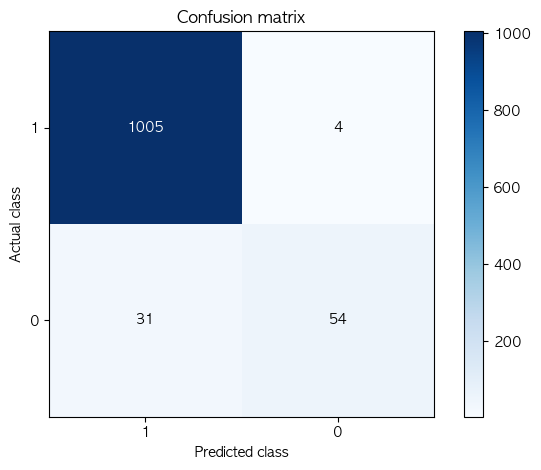

In [61]:
model_run(et, train_X, train_y, test_X, test_y)

Variable: ndvi                Importance: 0.26
Variable: gndvi_deviation     Importance: 0.14
Variable: nd_std              Importance: 0.1
Variable: brightness          Importance: 0.09
Variable: slope_mean          Importance: 0.09
Variable: ndvi_change_deviationImportance: 0.08
Variable: relative_relief     Importance: 0.07
Variable: ratio_rg_change_deviationImportance: 0.06
Variable: slope_max           Importance: 0.05
Variable: brightness_change_deviationImportance: 0.04


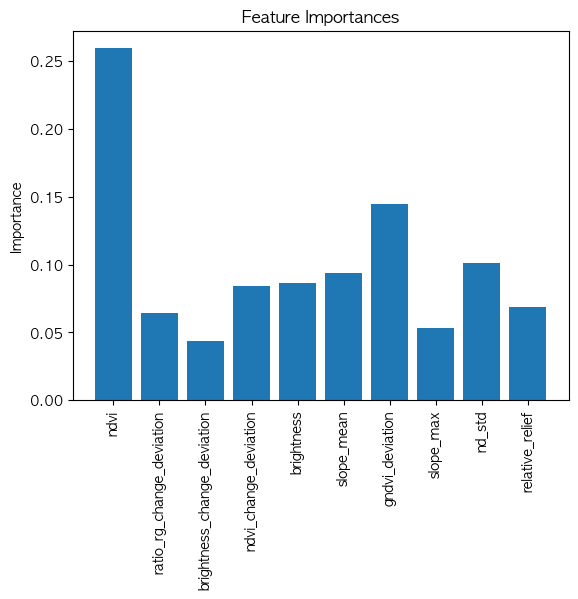

In [62]:
feature_importance_graph(et) #ranking the features

### SVM

In [49]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(train_X, train_y)

print(f"Accuracy for SVM: {accuracy_score(test_y, svm.predict(test_X))}")
print(f"F1 Score for SVM: {f1_score(test_y, svm.predict(test_X))}")

Accuracy for SVM: 0.9515539305301646
F1 Score for SVM: 0.6344827586206897



Classification_report:

               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1009
           1       0.77      0.54      0.63        85

    accuracy                           0.95      1094
   macro avg       0.86      0.76      0.80      1094
weighted avg       0.95      0.95      0.95      1094

[[995  14]
 [ 39  46]]
------------------------------------------------------



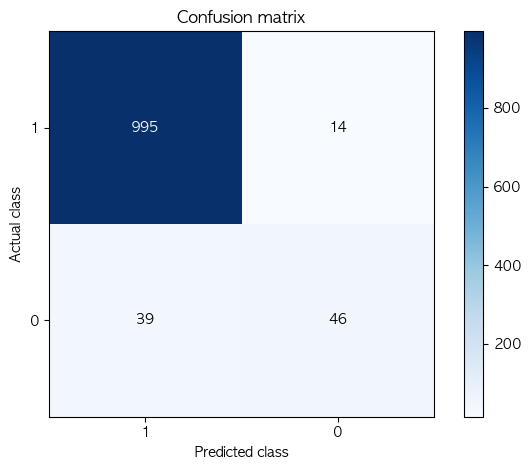

In [50]:
model_run(svm, train_X, train_y, test_X, test_y)

### Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(train_X, train_y)

print(f"Accuracy for Naive Bayes: {accuracy_score(test_y, nb.predict(test_X))}")
print(f"F1 Score for Naive Bayes: {f1_score(test_y, nb.predict(test_X))}")


Accuracy for Naive Bayes: 0.9360146252285192
F1 Score for Naive Bayes: 0.6666666666666666



Classification_report:

               precision    recall  f1-score   support

           0       0.98      0.95      0.96      1009
           1       0.56      0.82      0.67        85

    accuracy                           0.94      1094
   macro avg       0.77      0.88      0.82      1094
weighted avg       0.95      0.94      0.94      1094

[[954  55]
 [ 15  70]]
------------------------------------------------------



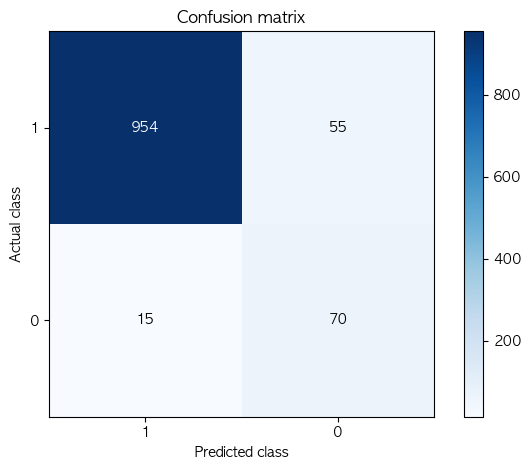

In [52]:
model_run(nb, train_X, train_y, test_X, test_y)

# 6. 변수 중요도 시각화

In [63]:
import skimage
import shap

In [64]:
lgbm = LGBMClassifier(**grid_search_lgbm.best_params_)
lgbm.fit(train_X, train_y)

print(f"Accuracy for LGBM : {accuracy_score(test_y, lgbm.predict(test_X))}")
print(f"F1_score for LGBM : {f1_score(test_y, lgbm.predict(test_X))}")

Accuracy for LGBM : 0.9789762340036563
F1_score for LGBM : 0.8516129032258064


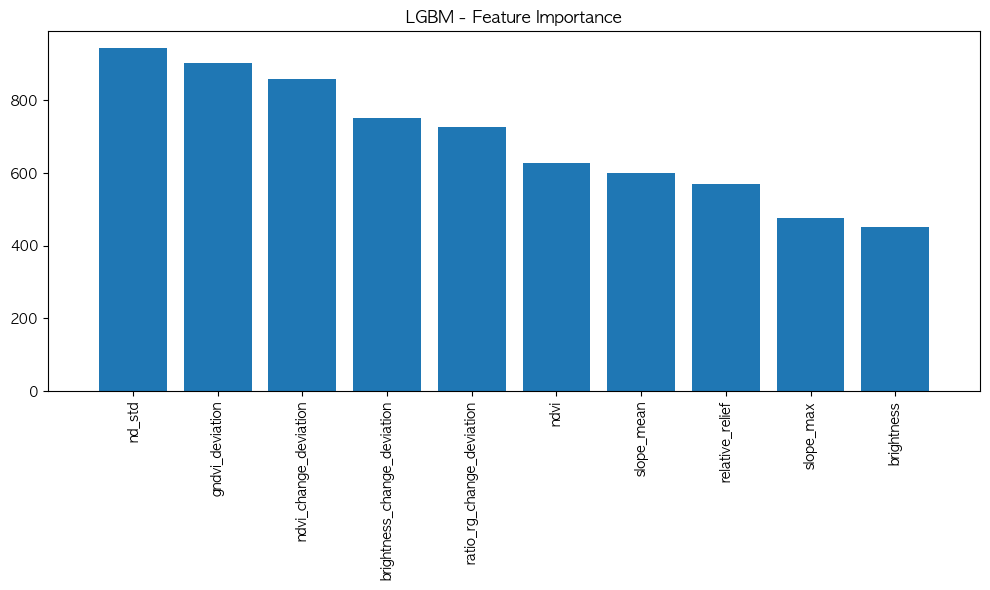

In [65]:
importances = lgbm.feature_importances_

# 변수 중요도를 내림차순으로 정렬
indices = importances.argsort()[::-1]

# 변수 이름 추출 (여기서 train_X은 학습 데이터의 독립 변수입니다.)
feature_names = train_X.columns

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("LGBM - Feature Importance")
plt.bar(range(train_X.shape[1]), importances[indices], align="center")
plt.xticks(range(train_X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

In [66]:
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(test_X)

In [67]:
shap_values[0].shape

(1094, 10)

In [69]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value[0], shap_values[0])

In [70]:
shap_values[0][0,:]

array([ 1.63431909, -2.6744496 , -1.23577669,  0.61788241, -1.19175712,
       -0.55913487,  7.70521124, -2.04476049, -4.33969893, -1.33010431])

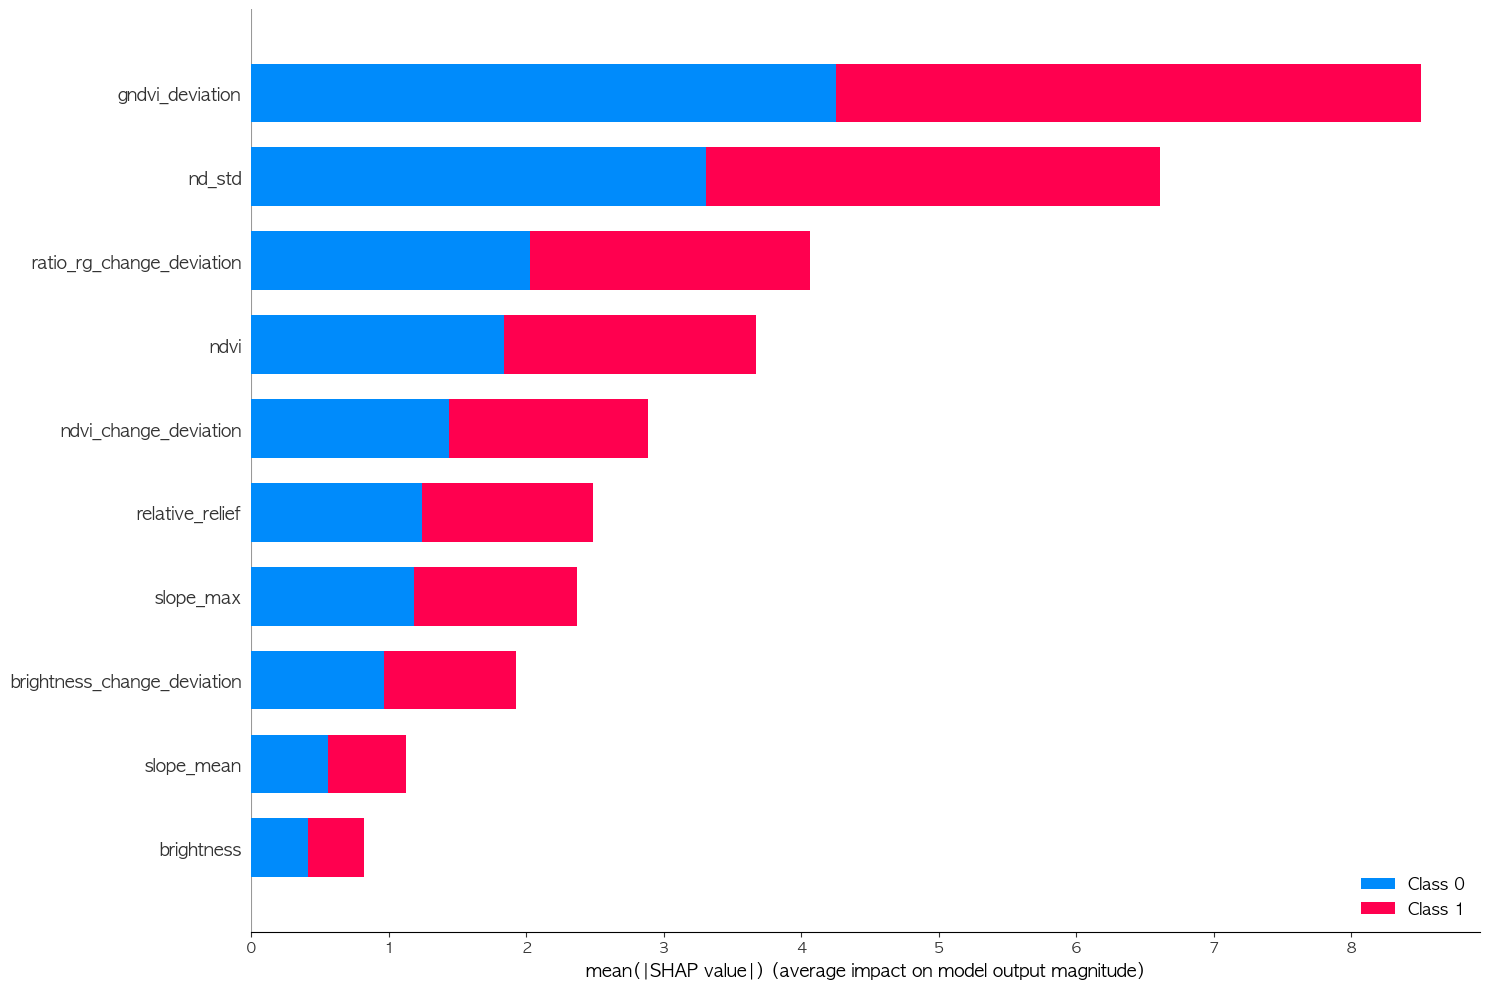

In [72]:
# summary
shap.summary_plot(shap_values, test_X, max_display=15, plot_size=(15,10))

In [73]:
test_X.columns.shape

(10,)

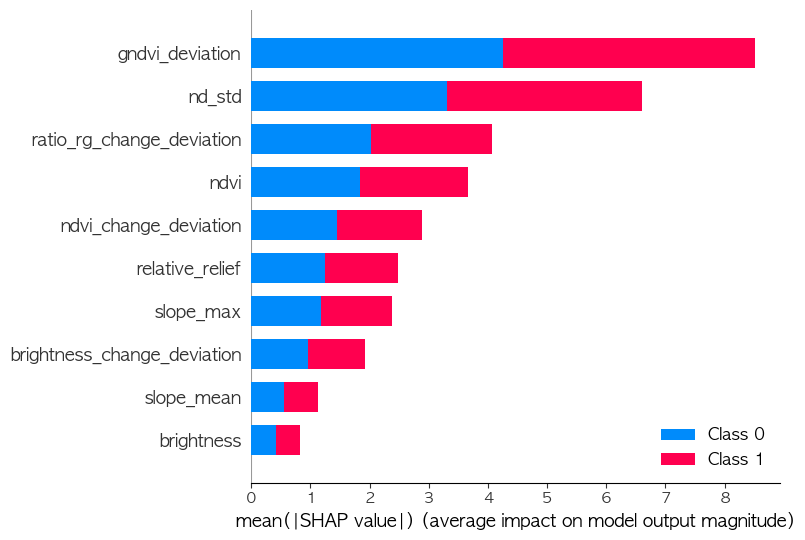

In [74]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, test_X, plot_type = "bar")

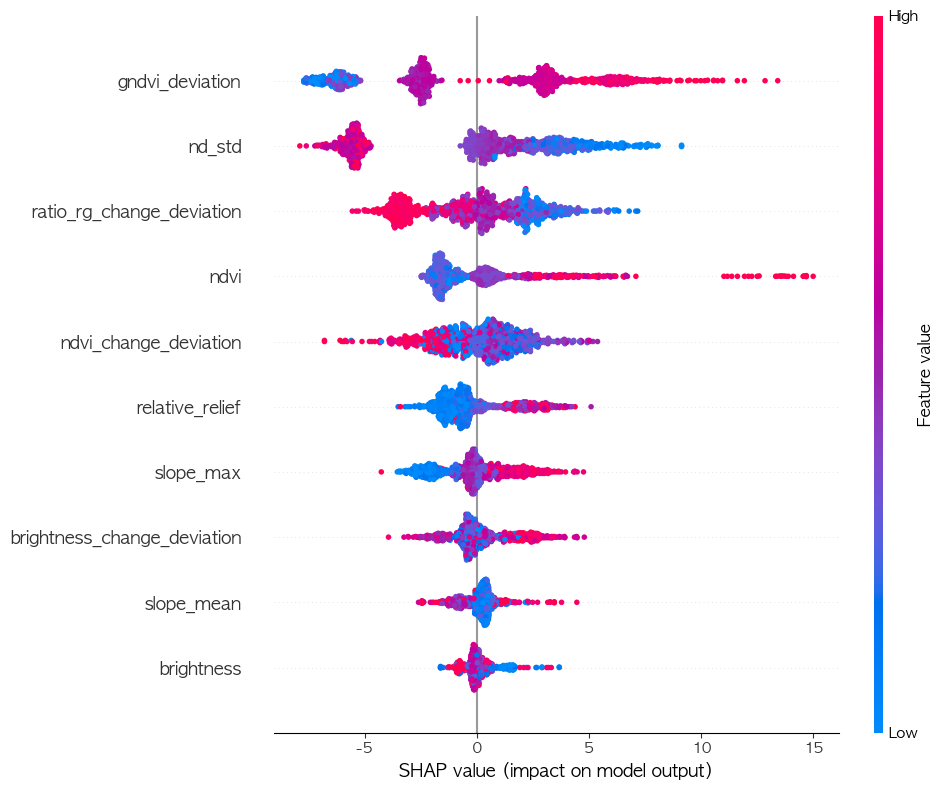

In [75]:
shap.summary_plot(shap_values[1], test_X, plot_size=(10,8))

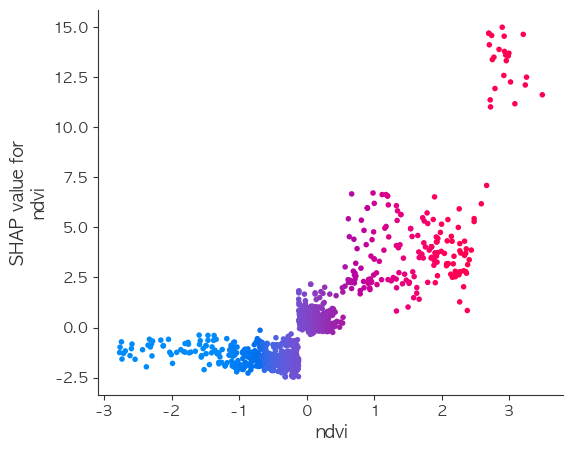

In [76]:
# 변수 간의 shap value 파악
shap.dependence_plot("ndvi", shap_values[1], test_X, interaction_index="ndvi")

### 변수 중요도

In [77]:
feature_names = train_X.columns

rf_resultX = pd.DataFrame(shap_values[1], columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

,col_name,feature_importance_vals
6,gndvi_deviation,4.255977
8,nd_std,3.305355
1,ratio_rg_change_deviation,2.030623
0,ndvi,1.835634
3,ndvi_change_deviation,1.442041
9,relative_relief,1.241319
7,slope_max,1.186225
2,brightness_change_deviation,0.963159
5,slope_mean,0.562030
4,brightness,0.411213


# 7. Logistic

#### LightGBM Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
lgbm = LGBMClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 500, 1000]
}

# Perform grid search
grid_search_lgbm = GridSearchCV(lgbm, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)
grid_search_lgbm.fit(train_X, train_y)

# Print the best hyperparameters
print("Best hyperparameters for LightGBM: ", grid_search_lgbm.best_params_)

Best hyperparameters for LightGBM:  {'learning_rate': 0.1, 'n_estimators': 1000, 'num_leaves': 10}


# LGBM final 저장

Create model file


In [84]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
from joblib import dump, load

In [87]:
from joblib import dump, load

dump(lgbm_final, './final_model', compress=0)

['/Users/yeorii/Desktop/Competitions/2309KETI/landslides_detection/modelfinal_model']